In [1]:
# importing libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# checking for missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#checking for skewness
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [7]:
# From the above observation we conclude that residual sugar, chlorides ,free sulfurdioxide,total sulfurdioxide and sulphates columns a skewed which could be due to outliers present in the data

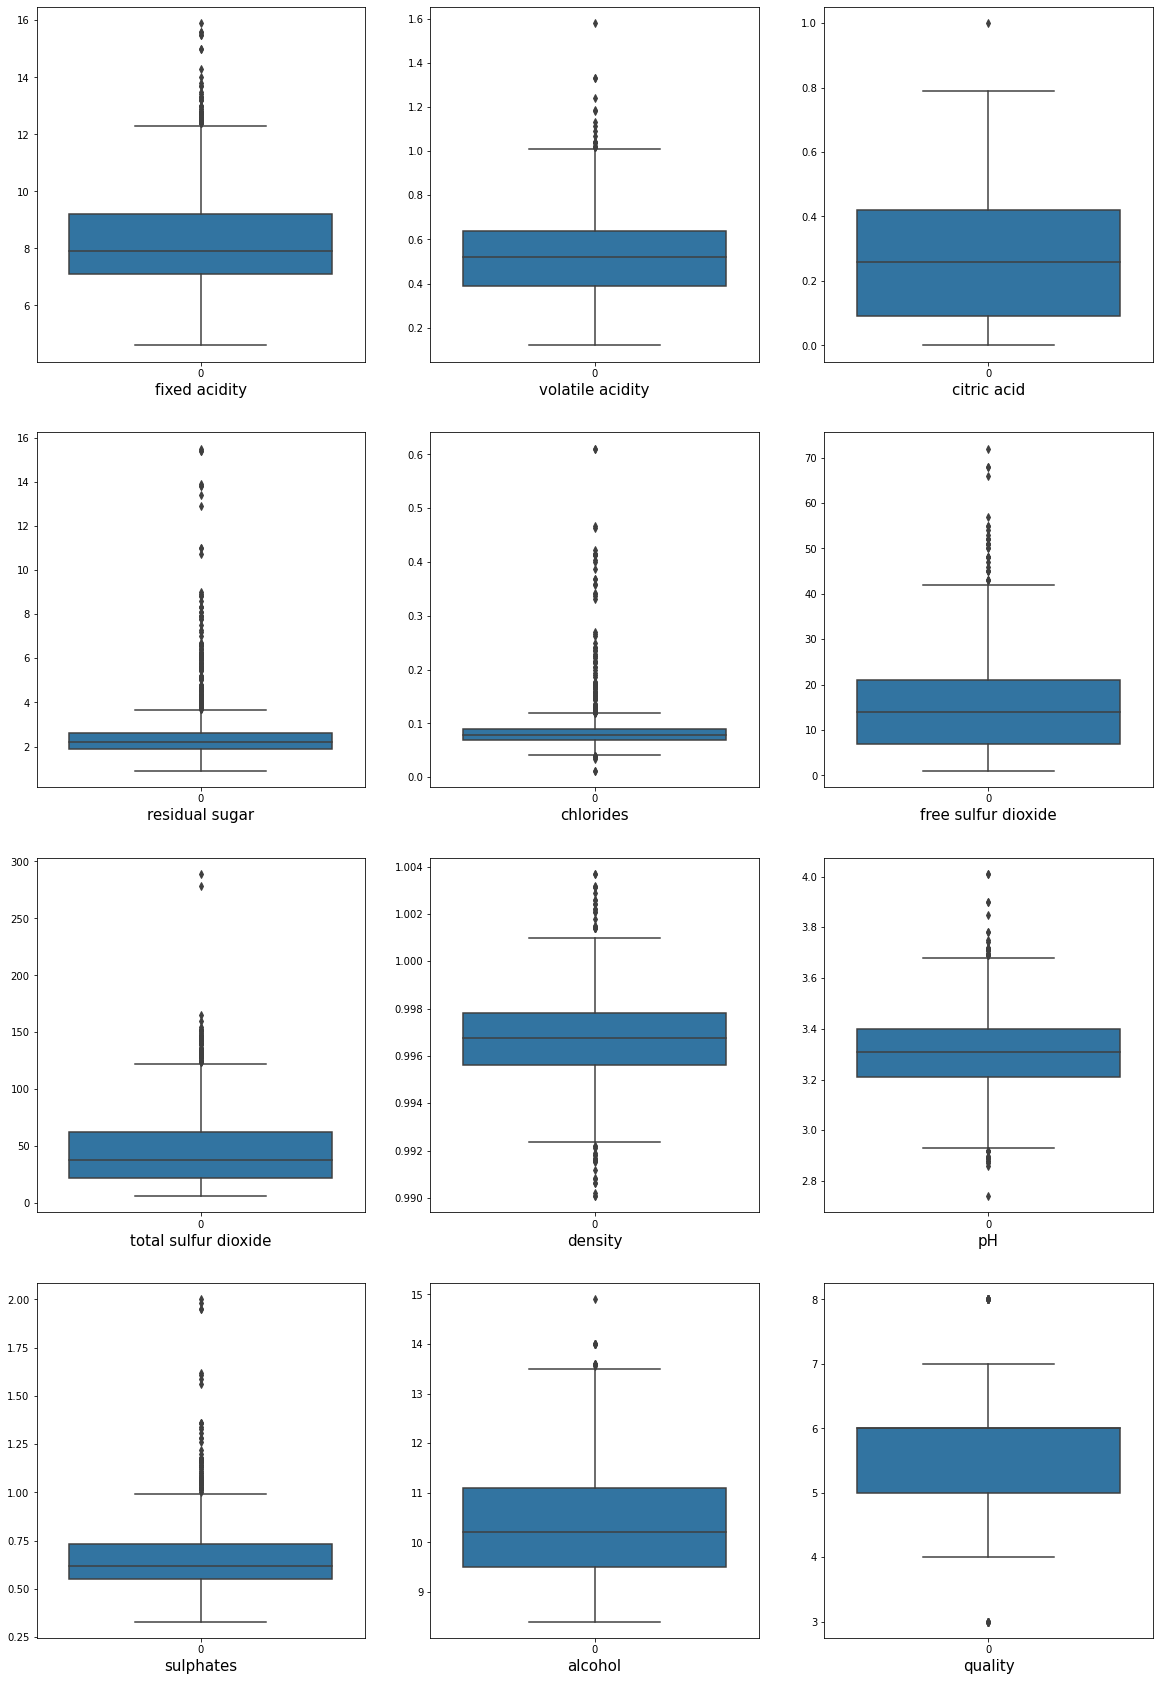

In [8]:
# Checking for outliers using boxplot
plt.figure(figsize=(20,30))
graph =1
for column in data:
    if graph <=12:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [9]:
# from the above graphs we can say that almost all columns have outliers which is leading to skewness of data 

In [10]:
features = data.drop(columns="quality")

In [11]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
#Treating outliers:
# z-score method
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers = np.where(z>3)
outliers

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [13]:
new_data=data.drop(outliers[0])
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
data_loss=((1599-1458)/1599)*100
data_loss

8.818011257035648

In [15]:
#checking for skewness
new_data.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 0.248823
dtype: float64

In [16]:
#Skewness is reduced


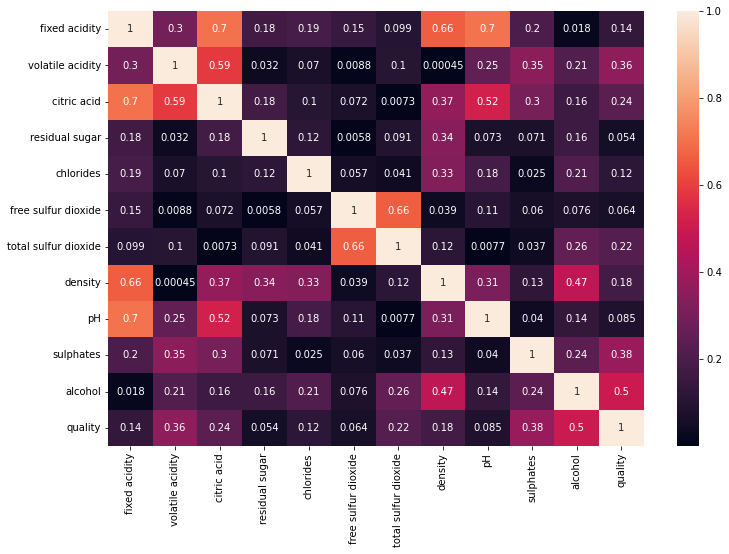

In [17]:
# Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = new_data.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()


In [18]:
# looks like
#pH has a strong relation with fixed acidity(muliticollinearity) and weak realtion with quality(feature v/s label) 
#density has a storng relation with fixed acidity
#free sulfur dioxide and totalsulfur dioxide have a strog relation 


In [19]:
# Dividing data into feature and label
X= new_data.drop(columns=['quality'])
Y= new_data['quality']

In [20]:
#Applying standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,7.941157,fixed acidity
1,1.869151,volatile acidity
2,3.200976,citric acid
3,1.657880,residual sugar
4,1.170025,chlorides
5,1.936150,free sulfur dioxide
6,2.182674,total sulfur dioxide
7,6.420347,density
8,3.199093,pH
9,1.311525,sulphates


In [22]:
#vif for fixed acidity and density is greater than 5, but will not drop the columns as they seem to have a strog relation with the label

In [23]:
# checking unique values in the label:
print(Y.value_counts(normalize=True, dropna=False)*100)

5    42.318244
6    40.192044
7    12.688615
4     3.223594
8     1.097394
3     0.480110
Name: quality, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

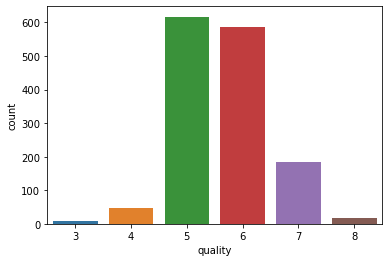

In [24]:
sns.countplot(Y)
plt.show

In [25]:
qty = []
for i in Y:
    if i<7:
        qty.append(0)
    else:
        i=1
        qty.append(1)
qty


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [26]:
y= pd.DataFrame({'qty':qty})
y

,qty
0,0
1,0
2,0
3,0
4,0
...,...
1453,0
1454,0
1455,0
1456,0


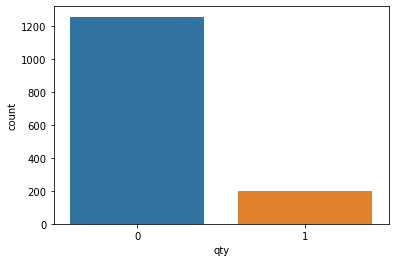

In [27]:
sns.countplot(y['qty'])
plt.show()

In [28]:
# the target is imbalanced 
#we will balance it using SMOTE
from imblearn.over_sampling import SMOTE

In [29]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,y, test_size=0.25, random_state = 285)

In [30]:
x_train_rs,y_train_rs= SMOTE().fit_resample(x_train,y_train)

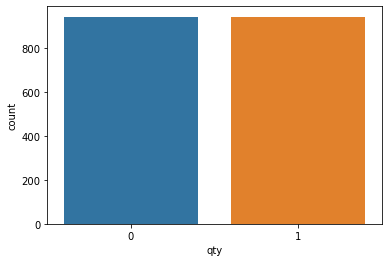

In [31]:
sns.countplot(y_train_rs['qty'])
plt.show()

In [32]:
# Target is balanced

In [33]:
# Model Selection
def model_selection (algorithm, x_train_rs,y_train_rs,x_test,y_test):
    algorithm.fit(x_train_rs,y_train_rs)
    pred_train = algorithm.predict(x_train_rs)
    pred_test = algorithm.predict(x_test)
    print ("Acuraccy of training model :",accuracy_score(y_train_rs,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Classification report of training data :",classification_report(y_train_rs,pred_train))
    print ("Classification report of test data : ",classification_report(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))
    
        

In [34]:
#Logistic Regression
lg= LogisticRegression()


In [35]:
model_selection(lg,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.8324496288441146
Accuracy of testing model : 0.7835616438356164
Classification report of training data :               precision    recall  f1-score   support

           0       0.85      0.81      0.83       943
           1       0.82      0.86      0.84       943

    accuracy                           0.83      1886
   macro avg       0.83      0.83      0.83      1886
weighted avg       0.83      0.83      0.83      1886

Classification report of test data :                precision    recall  f1-score   support

           0       0.96      0.78      0.86       314
           1       0.38      0.82      0.52        51

    accuracy                           0.78       365
   macro avg       0.67      0.80      0.69       365
weighted avg       0.88      0.78      0.81       365

Confusion Matrix 
 [[244  70]
 [  9  42]]


In [36]:
#KNN
knn= KNeighborsClassifier()

In [37]:
model_selection(knn,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.9231177094379639
Accuracy of testing model : 0.8
Classification report of training data :               precision    recall  f1-score   support

           0       1.00      0.85      0.92       943
           1       0.87      1.00      0.93       943

    accuracy                           0.92      1886
   macro avg       0.93      0.92      0.92      1886
weighted avg       0.93      0.92      0.92      1886

Classification report of test data :                precision    recall  f1-score   support

           0       0.97      0.80      0.87       314
           1       0.40      0.82      0.54        51

    accuracy                           0.80       365
   macro avg       0.68      0.81      0.70       365
weighted avg       0.89      0.80      0.83       365

Confusion Matrix 
 [[250  64]
 [  9  42]]


In [38]:
# Hyperparameter Tuning using GridSearchCV:
grid_param={
    'algorithm':['kd-tree','brute'],
    'leaf_size': range(3,7),
    'n_neighbors': range(3,10),
        
}

In [39]:
grid_search = GridSearchCV(estimator=knn,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [40]:
grid_search.fit(x_train_rs,y_train_rs)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['kd-tree', 'brute'],
                         'leaf_size': range(3, 7),
                         'n_neighbors': range(3, 10)})

In [41]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 4}


In [42]:
knn1 = KNeighborsClassifier(algorithm='brute',leaf_size=3,n_neighbors=4)

In [43]:
model_selection(knn1,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.9559915164369035
Accuracy of testing model : 0.8273972602739726
Classification report of training data :               precision    recall  f1-score   support

           0       1.00      0.91      0.95       943
           1       0.92      1.00      0.96       943

    accuracy                           0.96      1886
   macro avg       0.96      0.96      0.96      1886
weighted avg       0.96      0.96      0.96      1886

Classification report of test data :                precision    recall  f1-score   support

           0       0.95      0.84      0.89       314
           1       0.43      0.75      0.55        51

    accuracy                           0.83       365
   macro avg       0.69      0.79      0.72       365
weighted avg       0.88      0.83      0.84       365

Confusion Matrix 
 [[264  50]
 [ 13  38]]


In [44]:
#Decision Tree
dt = DecisionTreeClassifier()


In [45]:
model_selection(dt,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 1.0
Accuracy of testing model : 0.852054794520548
Classification report of training data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       943
           1       1.00      1.00      1.00       943

    accuracy                           1.00      1886
   macro avg       1.00      1.00      1.00      1886
weighted avg       1.00      1.00      1.00      1886

Classification report of test data :                precision    recall  f1-score   support

           0       0.95      0.87      0.91       314
           1       0.48      0.75      0.58        51

    accuracy                           0.85       365
   macro avg       0.72      0.81      0.75       365
weighted avg       0.89      0.85      0.86       365

Confusion Matrix 
 [[273  41]
 [ 13  38]]


In [46]:
# Hyperparameter Tuning using GridSearchCV:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6)
    
}

In [47]:
grid_search = GridSearchCV(estimator=dt,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [48]:
grid_search.fit(x_train_rs,y_train_rs)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(8, 12),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(3, 6)})

In [49]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [50]:
dt1 = DecisionTreeClassifier(criterion= 'gini', max_depth = 11, min_samples_leaf = 2, min_samples_split = 3)


In [51]:
model_selection(dt1,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.9787910922587487
Accuracy of testing model : 0.8410958904109589
Classification report of training data :               precision    recall  f1-score   support

           0       0.97      0.99      0.98       943
           1       0.99      0.97      0.98       943

    accuracy                           0.98      1886
   macro avg       0.98      0.98      0.98      1886
weighted avg       0.98      0.98      0.98      1886

Classification report of test data :                precision    recall  f1-score   support

           0       0.95      0.86      0.90       314
           1       0.46      0.71      0.55        51

    accuracy                           0.84       365
   macro avg       0.70      0.78      0.73       365
weighted avg       0.88      0.84      0.85       365

Confusion Matrix 
 [[271  43]
 [ 15  36]]


In [52]:
#Random Forest 
rf= RandomForestClassifier()

In [53]:
model_selection(rf,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 1.0
Accuracy of testing model : 0.915068493150685
Classification report of training data :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       943
           1       1.00      1.00      1.00       943

    accuracy                           1.00      1886
   macro avg       1.00      1.00      1.00      1886
weighted avg       1.00      1.00      1.00      1886

Classification report of test data :                precision    recall  f1-score   support

           0       0.96      0.94      0.95       314
           1       0.67      0.78      0.72        51

    accuracy                           0.92       365
   macro avg       0.82      0.86      0.84       365
weighted avg       0.92      0.92      0.92       365

Confusion Matrix 
 [[294  20]
 [ 11  40]]


In [54]:
# Hyperparameter Tuning using GridSearchCV:
grid_param={
    'n_estimators': range(25,30),
    'criterion':['gini','entropy'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(5,8),
    'min_samples_split':range(3,6)
    
}

In [55]:
grid_search = GridSearchCV(estimator=rf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=-1)

In [56]:
grid_search.fit(x_train_rs,y_train_rs)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(8, 12),
                         'min_samples_leaf': range(5, 8),
                         'min_samples_split': range(3, 6),
                         'n_estimators': range(25, 30)})

In [57]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 26}


In [58]:
#Random Forest : Gussian Classifier
rf1= RandomForestClassifier(n_estimators=28, criterion= 'entropy', max_depth = 10, min_samples_leaf = 5, min_samples_split = 4)

In [59]:
model_selection(rf1,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.971898197242842
Accuracy of testing model : 0.8958904109589041
Classification report of training data :               precision    recall  f1-score   support

           0       0.99      0.95      0.97       943
           1       0.96      0.99      0.97       943

    accuracy                           0.97      1886
   macro avg       0.97      0.97      0.97      1886
weighted avg       0.97      0.97      0.97      1886

Classification report of test data :                precision    recall  f1-score   support

           0       0.97      0.91      0.94       314
           1       0.59      0.80      0.68        51

    accuracy                           0.90       365
   macro avg       0.78      0.86      0.81       365
weighted avg       0.91      0.90      0.90       365

Confusion Matrix 
 [[286  28]
 [ 10  41]]


<function matplotlib.pyplot.show(close=None, block=None)>

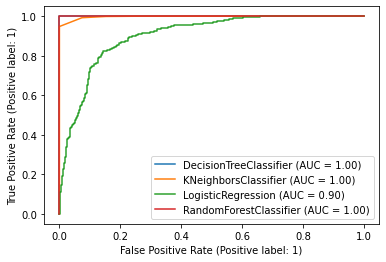

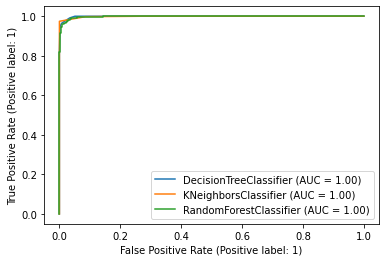

In [60]:

disp = plot_roc_curve(dt,x_train_rs,y_train_rs)
plot_roc_curve(knn,x_train_rs,y_train_rs, ax=disp.ax_)
plot_roc_curve(lg,x_train_rs,y_train_rs, ax=disp.ax_)
plot_roc_curve(rf,x_train_rs,y_train_rs, ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show
disp1 = plot_roc_curve(dt1,x_train_rs,y_train_rs)
plot_roc_curve(knn1,x_train_rs,y_train_rs, ax=disp1.ax_)
plot_roc_curve(rf1,x_train_rs,y_train_rs, ax=disp1.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

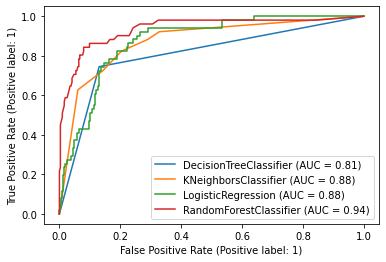

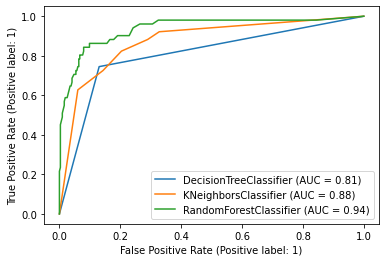

In [61]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)
plot_roc_curve(lg,x_test,y_test, ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

disp1 = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(knn,x_test,y_test, ax=disp1.ax_)
plot_roc_curve(rf,x_test,y_test, ax=disp1.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

In [62]:
# Since AUC for random forest is the most we choose randonforest classifier to be the best

In [63]:
# Saving Model
import pickle
filename= 'Wine.pkl'
pickle.dump(rf,open(filename, 'wb'))

In [64]:
#Conclusion
a= np.array(y_test)
orignal = a.flatten()
predicted=np.array (rf.predict(x_test))
df = pd.DataFrame({"Orignal":orignal, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
360,1,1
361,0,0
362,0,0
363,1,1
